# 非线性回归问题

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/dzm/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<class 'numpy.ndarray'> float64 (100, 1) (100, 1)
[[-1.        ]
 [-0.97979798]
 [-0.95959596]
 [-0.93939394]
 [-0.91919192]] [[15.03811585]
 [14.78960684]
 [14.61630904]
 [14.40366151]
 [14.23615751]]


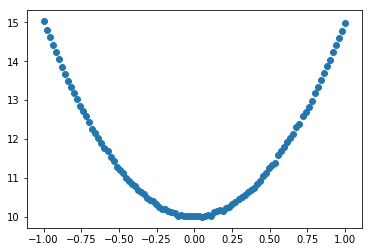

In [9]:
# 原始数据

x_data = np.linspace(-1, 1, num=100)[:, np.newaxis]
noise = np.random.normal(0,0.02, x_data.shape)
y_data = 5 * x_data **2 + 10 + noise
print(type(x_data), x_data.dtype, x_data.shape, y_data.shape)
print(x_data[0:5], y_data[0:5])
plt.scatter(x_data, y_data)

In [10]:
# 定义网络，一个隐藏层，包含5个神经元
x = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="input_x")
y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="input_y")

# 定义隐藏层
weight_1= tf.Variable(tf.random_normal([1,5]), name="weight_1")
bias_1 = tf.Variable(tf.zeros([1,5]), name="bias_1")
#output_1 = x * weight_1 + bias_1 千万不用用点乘，点乘是对应相乘
output_1 = tf.matmul(x, weight_1) + bias_1
output_1 = tf.nn.tanh(output_1, name="output_1")

# 定义输出层
weight_2 = tf.Variable(initial_value=tf.random_normal([5, 1]), name="weight_2")
bias_2 = tf.Variable(initial_value=tf.zeros([1,1]), name="bias_2")
output_2 = tf.matmul(output_1 , weight_2) + bias_2
output_2 = tf.nn.tanh(output_2, name="output_2")

# 定义损失函数
loss = tf.reduce_mean(tf.square(y-output_2))
# 定义优化器
optimize = tf.train.GradientDescentOptimizer(0.1)
# 定义训练步骤，最小化代价函数
train_step = optimize.minimize(loss)


[[15.0381155]
 [14.789607 ]
 [14.616309 ]
 [14.403662 ]
 [14.236157 ]
 [14.044289 ]
 [13.85778  ]
 [13.664567 ]
 [13.495243 ]
 [13.339006 ]
 [13.182636 ]
 [13.038752 ]
 [12.855207 ]
 [12.716025 ]
 [12.591529 ]
 [12.445297 ]
 [12.254633 ]
 [12.142942 ]
 [12.014267 ]
 [11.886802 ]
 [11.775856 ]
 [11.699    ]
 [11.540824 ]
 [11.44437  ]
 [11.290851 ]
 [11.194233 ]
 [11.124444 ]
 [10.997814 ]
 [10.930236 ]
 [10.85437  ]
 [10.80225  ]
 [10.701331 ]
 [10.631261 ]
 [10.5898   ]
 [10.496148 ]
 [10.439341 ]
 [10.394715 ]
 [10.331965 ]
 [10.260579 ]
 [10.205997 ]
 [10.192494 ]
 [10.139308 ]
 [10.131937 ]
 [10.08742  ]
 [10.01126  ]
 [10.042308 ]
 [10.008711 ]
 [10.033592 ]
 [10.013271 ]
 [10.010213 ]
 [10.030734 ]
 [10.016876 ]
 [ 9.985653 ]
 [10.029957 ]
 [10.055088 ]
 [10.028881 ]
 [10.116643 ]
 [10.139722 ]
 [10.1820755]
 [10.160229 ]
 [10.223817 ]
 [10.263095 ]
 [10.332693 ]
 [10.390655 ]
 [10.4664345]
 [10.498717 ]
 [10.573193 ]
 [10.648258 ]
 [10.700441 ]
 [10.750883 ]
 [10.851275 ]
 [10.9

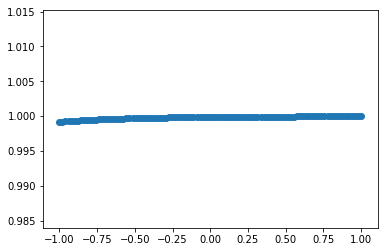

In [11]:
# 开始运行
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for index in range(100):
        _, result_y, result_output_2 = sess.run([train_step, y, output_2], feed_dict={
            x : x_data,
            y : y_data
        })
    print(result_y)
    print(result_output_2)
            
        
    # 预测
    predict = sess.run(output_2, feed_dict={
        x:x_data
    })
    plt.scatter(x_data, predict)
    #plt.plot(x_data, predict)